In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [86]:
#Loading the dataset of Restaurant Reviews
df = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t', quoting=3)

In [87]:
df.shape

(1000, 2)

In [88]:
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [90]:
df.describe()  #it will give total count,mean,sd

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [91]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [92]:
df['Liked'].nunique()

2

In [93]:
print(df['Liked'].unique())

[1 0]


In [94]:
df.drop_duplicates(inplace=True)

In [95]:
df.reset_index(drop=True, inplace=True)

In [96]:
df.shape

(996, 2)

In [97]:
df['Liked'].value_counts()

1    499
0    497
Name: Liked, dtype: int64

In [98]:
#visualizations

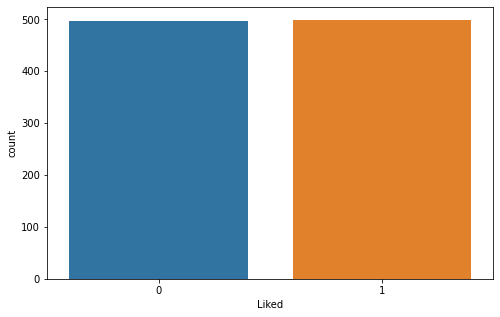

In [99]:
plt.figure(figsize=(8,5))
sns.countplot(x=df.Liked);

In [100]:
x=df['Review'].values
y=df['Liked'].values

In [101]:
import re #library for simplifying reviews
import nltk
nltk.download('stopwords') #downloading all the stopwords
from nltk.corpus import stopwords #importing stopwords to our notebook
from nltk.stem.porter import PorterStemmer #Stemming is a process that converts a word to its root eg loved => love, stayed => stay.
# this is necessary to optimise the dimention of the sparse matrix that will be made.


corpus = [] # new list that will contain all the cleaned reviews
for i in range(0,df.shape[0]):
    #remove punctuation by replacing all punctuation with space
    review = re.sub("[^a-zA-z | ^\w+'t]",' ', df['Review'][i])
    
    #transform all capital letters to lower case
    review = review.lower()
    
    #split review to different words to apply stemming
    review = review.split()
    
    #stemming and also ignoring stopwords alongside
    ps = PorterStemmer()
    all_stopwords=stopwords.words('english')
    r_words=['no','not','off','nor',"didn't","isn't","couldn't","haven't",'or',"should've","aren't",
             "couldn","didn","doesn't",'doesn',"don't",'don','hadn',"hadn't",'hasn',"hasn't",'haven',
             'mightn',"mightn't",'mustn',"mustn't","needn't",'needn',"shouldn","shouldn't",'wasn',
             "wasn't","won't","won","wouldn't","because","same",'wouldn','should']
    for words in r_words:
        all_stopwords.remove(words)
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    
    #joining words together to form a cleaned review
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to C:\Users\MY
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [102]:
print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday off rick steve recommend love', 'select menu great price', 'get angri want damn pho', "honeslti didn't tast fresh", 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier no care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust becaus pretti sure human hair', 'shock becaus no sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', "that' right red velvet cake ohhh stuff good", 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food 4 tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer 23 decent deal', 'like

In [103]:
import pickle

In [104]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y=df.iloc[:,-1].values

In [105]:
len(X[0])

1500

In [106]:
# Creating a pickle file for the CountVectorizer
pickle.dump(cv, open('cv-transform6.pkl', 'wb'))

In [107]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [108]:
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.0,1.1,0.1):
    temp_classifier = MultinomialNB(alpha=i)
    temp_classifier.fit(X_train, y_train)
    temp_y_pred = temp_classifier.predict(X_test)
    score = accuracy_score(y_test, temp_y_pred)
    print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
    if score>best_accuracy:
        best_accuracy = score
        alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.0 is: 78.5%
Accuracy score for alpha=0.1 is: 78.0%
Accuracy score for alpha=0.2 is: 79.0%
Accuracy score for alpha=0.3 is: 79.0%
Accuracy score for alpha=0.4 is: 80.0%
Accuracy score for alpha=0.5 is: 80.5%
Accuracy score for alpha=0.6 is: 80.5%
Accuracy score for alpha=0.7 is: 80.5%
Accuracy score for alpha=0.8 is: 80.0%
Accuracy score for alpha=0.9 is: 80.0%
Accuracy score for alpha=1.0 is: 80.5%
--------------------------------------------
The best accuracy is 80.5% with alpha value as 0.5


C:\Users\MY PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


In [109]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB(alpha=0.6)
classifier.fit(X_train,y_train)

MultinomialNB(alpha=0.6)

In [110]:
# Creating a pickle file for the Multinomial Naive Bayes model
filename = 'restaurant-sentiment-mnb-model6.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [111]:
y_model = classifier.predict(X_test)

In [112]:
y_model

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1], dtype=int64)

In [113]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
print(classification_report(y_test,y_model))
print("Accuracy Score is :",accuracy_score(y_test, y_model))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80        93
           1       0.85      0.78      0.81       107

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.80       200
weighted avg       0.81      0.81      0.81       200

Accuracy Score is : 0.805


Text(33.0, 0.5, 'Actual')

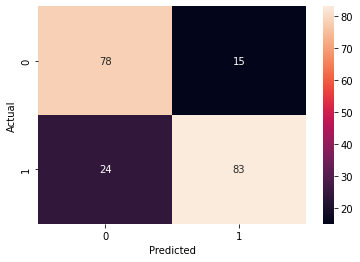

In [114]:
cm=confusion_matrix(y_test,y_model)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [115]:
# To Predict new Review: (for Positive review)

In [120]:
feedback = ""

newReview = ""

newReview = "* Both the Hot & Sour & the Egg Flower Soups were absolutely 5 Stars!"

def predict(new_review):   

        new_review = re.sub("[^a-zA-Z]", " ", new_review)   

        new_review = new_review.lower().split()

        new_review = [ps.stem(word) for word in new_review if word not in set(stopwords.words("english"))]   

        new_review = " ".join(new_review)   

        new_review = [new_review]   

        new_review = cv.transform(new_review).toarray()   

        if classifier.predict(new_review)[0] == 1:

            return "Positive"   

        else:       

            return "Negative"

       

feedback = predict(newReview)

print("This review is: ", feedback)

This review is:  Positive


In [117]:
# To Predict new Review: (for negative review)

In [121]:
feedback = ""

newReview = ""

newReview = "The chicken dishes are OK, the beef is like shoe leather."

def predict(new_review):   

        new_review = re.sub("[^a-zA-Z]", " ", new_review)   

        new_review = new_review.lower().split()

        new_review = [ps.stem(word) for word in new_review if word not in set(stopwords.words("english"))]   

        new_review = " ".join(new_review)   

        new_review = [new_review]   

        new_review = cv.transform(new_review).toarray()   

        if classifier.predict(new_review)[0] == 1:

            return "Positive"   

        else:       

            return "Negative"

       

feedback = predict(newReview)

print("This review is: ", feedback) 

This review is:  Negative


In [119]:
# def predict_sentiment(sample_review):
#   sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_review)
#   sample_review = sample_review.lower()
#   sample_review_words = sample_review.split()
#   sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
#   ps = PorterStemmer()
#   final_review = [ps.stem(word) for word in sample_review_words]
#   final_review = ' '.join(final_review)

#   temp = cv.transform([final_review]).toarray()
#   return model.predict(temp)